# Exercise 2 - Trees
Vi ska använda tre modeller för att avgöra om en person överlever Titanic eller inte

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('titanic.csv')

In [2]:
df

Unnamed: 0  PassengerId  Survived  Pclass  \
0              0            1       0.0       3   
1              1            2       1.0       1   
2              2            3       1.0       3   
3              3            4       1.0       1   
4              4            5       0.0       3   
...          ...          ...       ...     ...   
1304         413         1305       NaN       3   
1305         414         1306       NaN       1   
1306         415         1307       NaN       3   
1307         416         1308       NaN       3   
1308         417         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
0         0           A/5 21171    7.2500   NaN        S  
1         0            PC 17599   71.2833   C85        C  
2         0    STON/O2. 3101282    7.9250   NaN        S  
3         0              113803   53.1000  C123        S  
4         0              373450    8.0500   NaN        S  
...     ...                 ...       ...   ...      ...  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C  

[1309 rows x 13 columns]

In [3]:
# En schysst funktion för att göra någonting av kabin-nummer. Henrik delar upp cabin i CabinSection och CabinNumber 
# (baserat på bokstaven framför, och siffran efteråt).
def dictionary_function(df, col):
    my_value_list = sorted(list(set([item[0] for item in list(set(list(df[col].values)))])))
    my_ranking_list = list(range(len(my_value_list)))
    my_dictionary = {}
    for x,y in zip(my_value_list, my_ranking_list):
        my_dictionary[x] = y
    df.replace({col: my_dictionary}, inplace=True)
    return df

In [4]:
# Dumma kolumner tas bort.
dumb_cols = ['Unnamed: 0', 'Unnamed: 0.1']
for col in dumb_cols:
    if col in df.columns:
        df.drop(columns={col}, inplace=True)

# Kolumnen Survived har en jäkla massa null-värden. Vi får ta bort dessa. Inte kul, men raderna ger oss ingenting.
df = df[df['Survived'].notna()]

# Kolumnen Survived är strängar just nu. Vi gör om det till ints.
df['Survived'].replace({'Yes': 1, 'No':0}, inplace=True)
df['Survived'] = df['Survived'].astype(int)

# Vi fyller på avsaknade värden i kolumnen Age med genomsnittlig ålder. Vi 
df['Age'].fillna(round(df['Age'].mean()), inplace=True)
df['Age'] = df['Age'].apply(lambda x: df['Age'].mean() if x > 120 else x)
df['Age'] = df['Age'].astype(int)

# Vi fyller på avsaknade värden i kolumnen Embarked med Unknown.
df.Embarked.fillna('U', inplace=True)

# Vi fyller på avsaknade värden i kolumnen Cabin med U0.
df.Cabin.fillna('U0', inplace=True)

# Vi gör om kön till 1 och 0
df['Sex'] = df['Sex'].replace({'male':1,'female':0})

# Vi splittar vår kolumn Cabin i section och hyttnymmer.
# Sen använder vi vår schyssta funktion för att extrahera kabinsektion och hyttnummer.
df[['CabinSection', 'CabinNr', 'dummy']] = df["Cabin"].str.split("(\d+)", n=1, expand=True)
df.CabinSection = df.CabinSection.apply(lambda x: x[0])
df.CabinNr.fillna(0, inplace=True)
df.CabinNr = df.CabinNr.astype(int)
for col in ['CabinSection', 'Embarked']:
    df = dictionary_function(df, col)
    df[col].astype(int)

# Vi droppar alla konstiga kolumner som dykt upp under processen och som inte påverkar överlevnadschanserna.
df.drop(columns={'dummy', 'Cabin', 'Ticket', 'Name', 'PassengerId'}, inplace=True)

# Vi skalar/normaliserar vårt dataset
target_col = ['Survived']
feature_cols = [col for col in df.columns if col not in target_col]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_fit = scaler.fit(df[feature_cols])
df[feature_cols] = pd.DataFrame(scaler.transform(df[feature_cols]), index=df.index, columns=feature_cols)


# Vi definierar vårt target och våra features.
y = df[target_col]
X = df[feature_cols]

# Vi delar upp vårt dataset i train och test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


/var/folders/t3/c9yl4b8s3fd5vzr9v1gp94ym0000gp/T/ipykernel_7259/3694426188.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survived'].replace({'Yes': 1, 'No':0}, inplace=True)
/var/folders/t3/c9yl4b8s3fd5vzr9v1gp94ym0000gp/T/ipykernel_7259/3694426188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survived'] = df['Survived'].astype(int)
/var/folders/t3/c9yl4b8s3fd5vzr9v1gp94ym0000gp/T/ipykernel_7259/3694426188.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

## Decision Tree
1. Använd ett decision tree för att skapa predictions
2. Plotta trädet för att se hur det ser ut. Går det att förstå något?

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier() # optimize! Can we do it better?
model.fit(X_train, y_train)
preds = list(model.predict(X_test))

In [18]:
prediction_df = y_test
prediction_df['Our predictions'] = preds
acc = accuracy_score(prediction_df['Survived'], prediction_df['Our predictions'])
print(f'Vår accuracy är: {round(acc*100,3)}%')

Vår accuracy är: 76.493%


In [17]:
prediction_df

Survived  Our predictions
709         1                0
439         0                1
840         0                0
720         1                1
39          1                0
..        ...              ...
821         1                0
633         0                0
456         0                0
500         0                0
430         1                0

[268 rows x 2 columns]

In [11]:
fig = plt.figure(figsize=(300,300))
_ = plot_tree(model, 
                   feature_names=list(X_train.columns),  
                   class_names=['Died','Survived'],
                   filled=True)
plt.savefig('DecisionTree_Titanic.png')

## Random Forest
1. Använd en random forest för att skapa predictions.
2. Är denna bättre än vårt Decision Tree?
2. Plotta de 5 första träden i vår RandomForest för att se hur det ser ut. Går det att förstå något?

In [19]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier() # optimize! Can we do it better?
model_forest.fit(X_train, y_train)
preds = list(model_forest.predict(X_test))

/var/folders/t3/c9yl4b8s3fd5vzr9v1gp94ym0000gp/T/ipykernel_7259/1013424532.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest.fit(X_train, y_train)


In [21]:
y_test

Survived  Our predictions
709         1                0
439         0                1
840         0                0
720         1                1
39          1                0
..        ...              ...
821         1                0
633         0                0
456         0                0
500         0                0
430         1                0

[268 rows x 2 columns]

In [22]:
prediction_df = y_test
prediction_df['Our predictions'] = preds
acc = accuracy_score(prediction_df['Survived'], prediction_df['Our predictions'])
print(f'Vår accuracy är: {round(acc*100,3)}%')

Vår accuracy är: 79.104%


In [ ]:
out_trees = model_forest.estimators_
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index,tr in enumerate(model_forest.estimators_[:5]):
    plot_tree(tr,
               feature_names=list(X_train.columns),  
               class_names=['Died','Survived'],
               filled = True,
               ax = axes[index])

plt.savefig('RandomForest_Titanic.png')

In [23]:
len(model_forest.estimators_) # Default är att Random Forest består av 100 Decision Trees.

100

## XGBoost
1. Använd en XGBoostClassifier för att skapa predictions.
2. Är denna bättre än vårt Decision Tree och RandomForest?

In [25]:
import xgboost as xgb
from xgboost import plot_tree
model_XGB = xgb.XGBClassifier() # optimize! Can we do it better?
model_XGB.fit(X_train, y_train)
preds = list(model_XGB.predict(X_test))

In [26]:
prediction_df = y_test
prediction_df['Our predictions'] = preds
acc = accuracy_score(prediction_df['Survived'], prediction_df['Our predictions'])
print(f'Vår accuracy är: {round(acc*100,3)}%')

Vår accuracy är: 77.239%


/var/folders/t3/c9yl4b8s3fd5vzr9v1gp94ym0000gp/T/ipykernel_7259/1446754377.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('XGBoost_Titanic.png', figsize=(700,700))


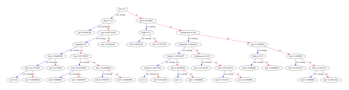

In [28]:
plot_tree(model_XGB)
plt.savefig('XGBoost_Titanic.png', figsize=(700,700))